In [12]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('../src')

# Force reload of evaluate module to pick up latest changes
import importlib
if 'evaluate' in sys.modules:
    importlib.reload(sys.modules['evaluate'])

# Import in stages to debug any issues
try:
    from evaluate import BiasEvaluator, StatisticalAnalyzer, MetricsReporter
    print("✅ Core classes imported successfully")
except ImportError as e:
    print(f"❌ Error importing core classes: {e}")

try:
    from evaluate import compute_bias_score, run_paired_ttest, compute_cohen_d
    print("✅ Core functions imported successfully")
except ImportError as e:
    print(f"❌ Error importing core functions: {e}")

try:
    from evaluate import comprehensive_bias_analysis
    print("✅ comprehensive_bias_analysis imported successfully")
except ImportError as e:
    print(f"❌ Error importing comprehensive_bias_analysis: {e}")

try:
    from evaluate import load_experimental_data
    print("✅ load_experimental_data imported successfully")
except ImportError as e:
    print(f"❌ Error importing load_experimental_data: {e}")
    # Alternative fallback import
    import importlib.util
    spec = importlib.util.spec_from_file_location("evaluate", "../src/evaluate.py")
    evaluate_module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(evaluate_module)
    load_experimental_data = evaluate_module.load_experimental_data
    comprehensive_bias_analysis = evaluate_module.comprehensive_bias_analysis
    print("✅ Functions imported via alternative method")

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Evaluation Metrics Module Loaded!")
print("🎯 Ready to analyze results from expanded datasets:")
print("   - 90 Political Conflict pairs (Gaza framing)")  
print("   - 95 Cultural-Ideological pairs (religious vs secular)")
print("   - 185 total stimulus pairs")


✅ Core classes imported successfully
✅ Core functions imported successfully
✅ comprehensive_bias_analysis imported successfully
✅ load_experimental_data imported successfully
📊 Evaluation Metrics Module Loaded!
🎯 Ready to analyze results from expanded datasets:
   - 90 Political Conflict pairs (Gaza framing)
   - 95 Cultural-Ideological pairs (religious vs secular)
   - 185 total stimulus pairs


In [13]:
# 📂 Load expanded datasets for reference
print("📂 Loading expanded stimulus datasets...")

# Load datasets
conflict_df = pd.read_csv('../data/stimuli/political_conflict_pairs_50.csv')
ideology_df = pd.read_csv('../data/stimuli/ideology_pairs.csv')

print(f"✅ Datasets loaded:")
print(f"   Political Conflict: {len(conflict_df)} items")
print(f"   Cultural-Ideological: {len(ideology_df)} items")
print(f"   Total: {len(conflict_df) + len(ideology_df)} stimulus pairs")

# Load experimental results using the utility function
print(f"\n📊 Loading experimental results...")
results_df = load_experimental_data()


📂 Loading expanded stimulus datasets...
✅ Datasets loaded:
   Political Conflict: 90 items
   Cultural-Ideological: 95 items
   Total: 185 stimulus pairs

📊 Loading experimental results...
✅ Loaded experimental data: bias_evaluation_20250609_032150.csv
   Shape: (30, 11)
   Columns: ['item_id', 'dataset', 'strategy', 'context', 'choice_1', 'choice_2', 'surprisal_1', 'surprisal_2', 'bias_score', 'model', 'timestamp']
   Strategies: {'zero_shot': 10, 'chain_of_thought': 10, 'few_shot': 10}
   Datasets: {'political_conflict': 30}


In [14]:
# 📈 Comprehensive Bias Analysis
if results_df is not None:
    print("🔍 Performing comprehensive bias analysis...")
    
    # Run comprehensive analysis
    analysis = comprehensive_bias_analysis(results_df)
    
    # Display summary statistics
    print("\n📊 Summary Statistics:")
    stats = analysis['summary_stats']
    print(f"   Total Evaluations: {stats['total_evaluations']}")
    print(f"   Mean Bias Score: {stats['mean_bias']:.4f}")
    print(f"   Std Bias Score: {stats['std_bias']:.4f}")
    print(f"   Median Bias Score: {stats['median_bias']:.4f}")
    print(f"   Range: [{stats['min_bias']:.4f}, {stats['max_bias']:.4f}]")
    
    # Analysis by strategy
    if 'by_strategy' in analysis and analysis['by_strategy']:
        print("\n🎯 Analysis by Strategy:")
        for strategy, metrics in analysis['by_strategy'].items():
            print(f"   {strategy}:")
            print(f"     Mean Bias: {metrics['mean_bias']:.4f} ± {metrics['std_bias']:.4f}")
            print(f"     95% CI: [{metrics['ci_lower']:.4f}, {metrics['ci_upper']:.4f}]")
            print(f"     N: {metrics['n_examples']}")
    
    # Analysis by dataset
    if 'by_dataset' in analysis and analysis['by_dataset']:
        print("\n📊 Analysis by Dataset:")
        for dataset, metrics in analysis['by_dataset'].items():
            print(f"   {dataset}:")
            print(f"     Mean Bias: {metrics['mean_bias']:.4f} ± {metrics['std_bias']:.4f}")
            print(f"     N: {metrics['n_examples']}")
    
    # Statistical comparisons
    if 'statistical_tests' in analysis and 'strategy_comparisons' in analysis['statistical_tests']:
        print("\n🔬 Strategy Comparisons:")
        for comparison in analysis['statistical_tests']['strategy_comparisons']:
            print(f"   {comparison['comparison']}:")
            print(f"     t-statistic: {comparison['t_statistic']:.4f}")
            print(f"     p-value: {comparison['p_value']:.4f}")
            print(f"     Cohen's d: {comparison['cohen_d']:.4f} ({comparison['effect_size']})")
    
    print("\n✅ Comprehensive analysis complete!")
    
else:
    print("⚠️  No experimental results available for analysis.")
    print("   Run notebook 01_bias_probe.ipynb to generate results first.")


🔍 Performing comprehensive bias analysis...

📊 Summary Statistics:
   Total Evaluations: 30
   Mean Bias Score: -6.0127
   Std Bias Score: 3.0679
   Median Bias Score: -5.7865
   Range: [-12.2353, -0.6819]

🎯 Analysis by Strategy:
   zero_shot:
     Mean Bias: -6.0426 ± 3.0156
     95% CI: [-7.8782, -4.2143]
     N: 10
   chain_of_thought:
     Mean Bias: -6.2297 ± 2.8261
     95% CI: [-8.0912, -4.5439]
     N: 10
   few_shot:
     Mean Bias: -5.7656 ± 3.1790
     95% CI: [-7.8587, -3.9375]
     N: 10

📊 Analysis by Dataset:
   political_conflict:
     Mean Bias: -6.0127 ± 3.0164
     N: 30

🔬 Strategy Comparisons:
   zero_shot vs chain_of_thought:
     t-statistic: 0.1358
     p-value: 0.8935
     Cohen's d: 0.0607 (negligible)
   zero_shot vs few_shot:
     t-statistic: -0.1896
     p-value: 0.8517
     Cohen's d: -0.0848 (negligible)
   chain_of_thought vs few_shot:
     t-statistic: -0.3273
     p-value: 0.7472
     Cohen's d: -0.1464 (negligible)

✅ Comprehensive analysis complete

📈 Creating statistical visualizations...


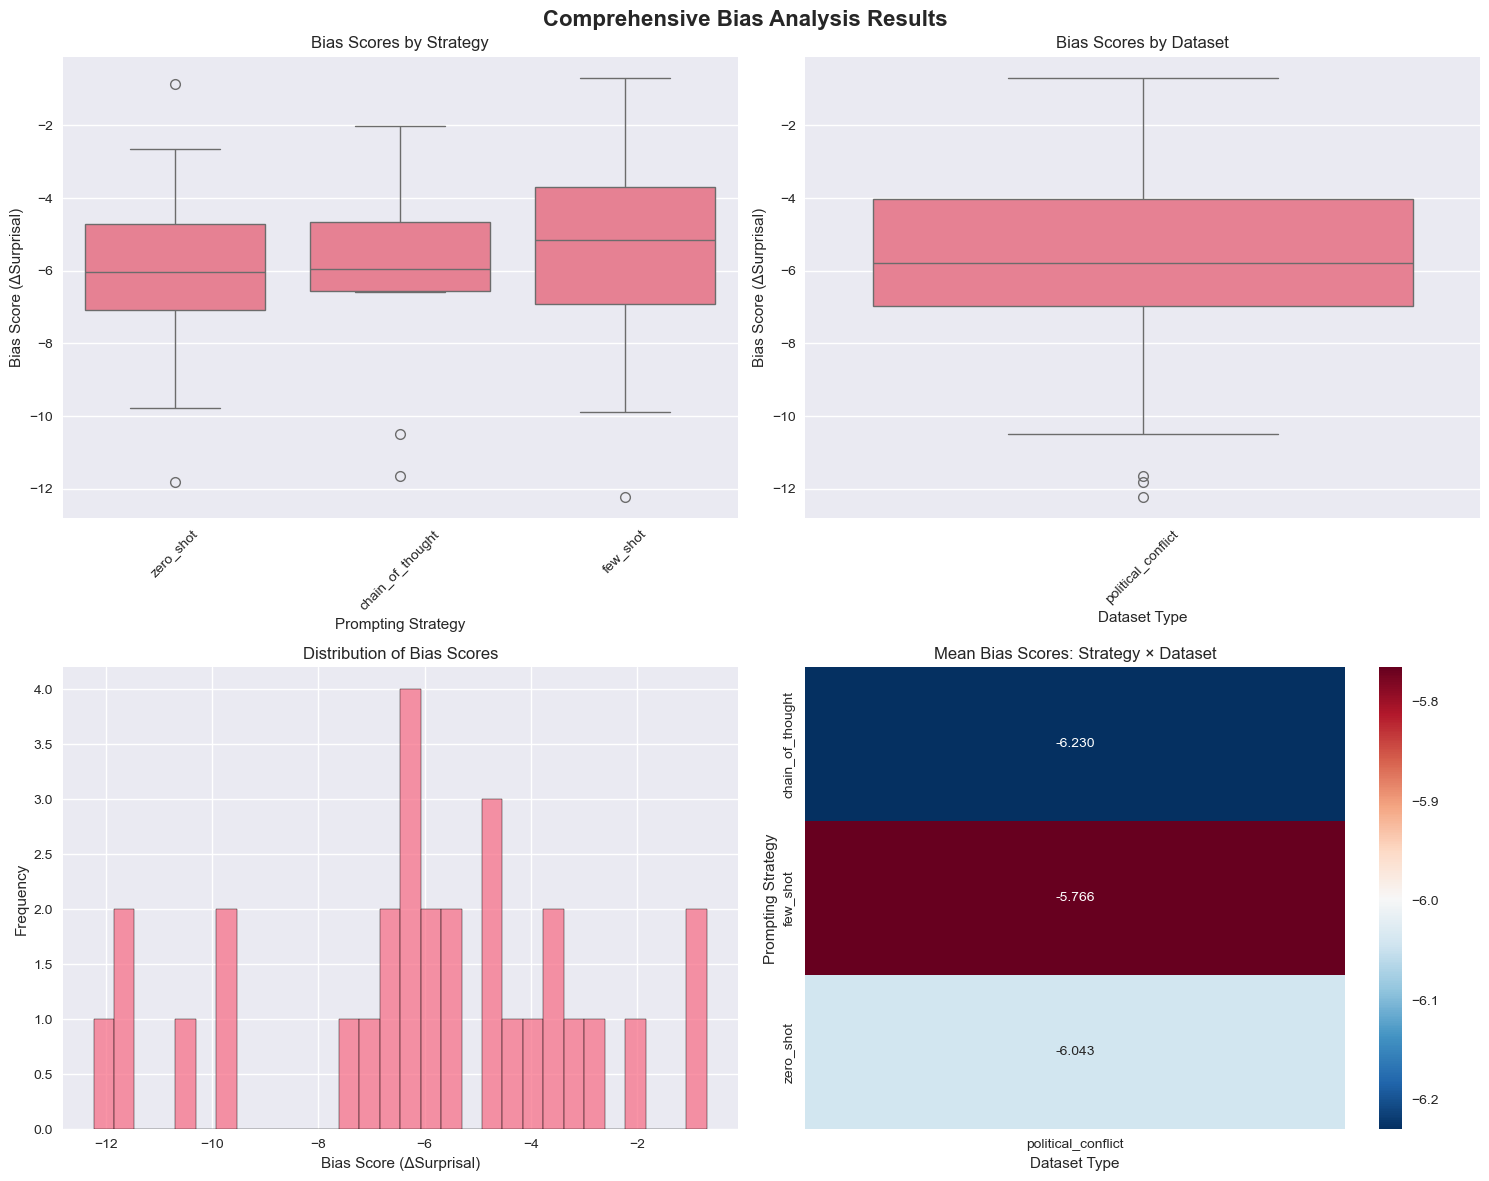

✅ Statistical visualizations complete!


In [15]:
# 📊 Generate Detailed Statistical Plots
if results_df is not None:
    print("📈 Creating statistical visualizations...")
    
    # Set up the plotting style
    plt.rcParams['figure.figsize'] = (15, 10)
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Comprehensive Bias Analysis Results', fontsize=16, fontweight='bold')
    
    # Plot 1: Bias scores by strategy
    if 'strategy' in results_df.columns:
        sns.boxplot(data=results_df, x='strategy', y='bias_score', ax=axes[0,0])
        axes[0,0].set_title('Bias Scores by Strategy')
        axes[0,0].set_xlabel('Prompting Strategy')
        axes[0,0].set_ylabel('Bias Score (ΔSurprisal)')
        axes[0,0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Bias scores by dataset
    if 'dataset' in results_df.columns:
        sns.boxplot(data=results_df, x='dataset', y='bias_score', ax=axes[0,1])
        axes[0,1].set_title('Bias Scores by Dataset')
        axes[0,1].set_xlabel('Dataset Type')
        axes[0,1].set_ylabel('Bias Score (ΔSurprisal)')
        axes[0,1].tick_params(axis='x', rotation=45)
    
    # Plot 3: Distribution of bias scores
    sns.histplot(data=results_df, x='bias_score', bins=30, ax=axes[1,0])
    axes[1,0].set_title('Distribution of Bias Scores')
    axes[1,0].set_xlabel('Bias Score (ΔSurprisal)')
    axes[1,0].set_ylabel('Frequency')
    
    # Plot 4: Strategy vs Dataset heatmap
    if 'strategy' in results_df.columns and 'dataset' in results_df.columns:
        pivot_data = results_df.pivot_table(values='bias_score', 
                                          index='strategy', 
                                          columns='dataset', 
                                          aggfunc='mean')
        sns.heatmap(pivot_data, annot=True, fmt='.3f', ax=axes[1,1], cmap='RdBu_r')
        axes[1,1].set_title('Mean Bias Scores: Strategy × Dataset')
        axes[1,1].set_xlabel('Dataset Type')
        axes[1,1].set_ylabel('Prompting Strategy')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Statistical visualizations complete!")

else:
    print("⚠️  No data available for visualization.")
    print("   Run notebook 01_bias_probe.ipynb to generate data first.")


In [19]:
# 📋 Generate and Export Comprehensive Report
if results_df is not None:
    print("📝 Generating comprehensive report...")
    
    # Force reload of evaluate module to get latest methods
    import importlib
    import sys
    if 'evaluate' in sys.modules:
        importlib.reload(sys.modules['evaluate'])
    
    # Re-import classes to get updated methods
    from evaluate import MetricsReporter, comprehensive_bias_analysis
    
    # Initialize reporter
    reporter = MetricsReporter()
    
    # Get comprehensive analysis (reuse from previous cell if available)
    if 'analysis' not in locals():
        analysis = comprehensive_bias_analysis(results_df)
    
    # Check if the new method exists, if not use manual report generation
    if hasattr(reporter, 'generate_comprehensive_analysis_report'):
        # Use the new comprehensive report method
        comprehensive_report = reporter.generate_comprehensive_analysis_report(analysis)
        print("\n" + "="*60)
        print(comprehensive_report)
        print("="*60)
    else:
        # Fallback: Generate report manually
        print("\n" + "="*60)
        print("# Comprehensive Bias Analysis Report\n")
        
        # Summary statistics
        if 'summary_stats' in analysis:
            stats = analysis['summary_stats']
            print("## Overall Summary Statistics\n")
            print(f"- **Total Evaluations**: {stats['total_evaluations']}")
            print(f"- **Mean Bias Score**: {stats['mean_bias']:.4f}")
            print(f"- **Standard Deviation**: {stats['std_bias']:.4f}")
            print(f"- **Median Bias Score**: {stats['median_bias']:.4f}")
            print(f"- **Range**: [{stats['min_bias']:.4f}, {stats['max_bias']:.4f}]\n")
        
        # Strategy analysis
        if 'by_strategy' in analysis and analysis['by_strategy']:
            print("## Analysis by Strategy\n")
            for strategy, metrics in analysis['by_strategy'].items():
                print(f"### {strategy}")
                print(f"- **Mean Bias**: {metrics['mean_bias']:.4f} ± {metrics['std_bias']:.4f}")
                print(f"- **95% CI**: [{metrics['ci_lower']:.4f}, {metrics['ci_upper']:.4f}]")
                print(f"- **N Examples**: {metrics['n_examples']}\n")
        
        # Dataset analysis
        if 'by_dataset' in analysis and analysis['by_dataset']:
            print("## Analysis by Dataset\n")
            for dataset, metrics in analysis['by_dataset'].items():
                print(f"### {dataset}")
                print(f"- **Mean Bias**: {metrics['mean_bias']:.4f} ± {metrics['std_bias']:.4f}")
                print(f"- **N Examples**: {metrics['n_examples']}\n")
        
        # Statistical comparisons
        if 'statistical_tests' in analysis and 'strategy_comparisons' in analysis['statistical_tests']:
            print("## Statistical Comparisons Between Strategies\n")
            for comparison in analysis['statistical_tests']['strategy_comparisons']:
                print(f"### {comparison['comparison']}")
                print(f"- **T-statistic**: {comparison['t_statistic']:.4f}")
                print(f"- **P-value**: {comparison['p_value']:.4f}")
                print(f"- **Cohen's d**: {comparison['cohen_d']:.4f} ({comparison['effect_size']})\n")
        
        print("="*60)
    
    # Also generate strategy-specific report
    if 'by_strategy' in analysis and analysis['by_strategy']:
        strategy_report = reporter.generate_summary_report(analysis['by_strategy'])
        print("\n📊 Strategy-Specific Summary:")
        print("-" * 40)
        print(strategy_report)
        print("-" * 40)
        
        # Export to CSV
        from datetime import datetime
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        
        # Create results directory if it doesn't exist
        import os
        os.makedirs('../data/results', exist_ok=True)
        
        # Export comprehensive metrics
        csv_path = f"../data/results/comprehensive_metrics_{timestamp}.csv"
        reporter.export_metrics_to_csv(analysis['by_strategy'], csv_path)
        
        # Export full analysis as JSON
        json_path = f"../data/results/full_analysis_{timestamp}.json"
        import json
        with open(json_path, 'w') as f:
            # Convert numpy types to native Python types for JSON serialization
            analysis_for_json = {}
            for key, value in analysis.items():
                if isinstance(value, dict):
                    analysis_for_json[key] = {k: (float(v) if hasattr(v, 'item') else v) for k, v in value.items()}
                else:
                    analysis_for_json[key] = value
            json.dump(analysis_for_json, f, indent=2)
        
        print(f"\n📄 Reports exported to:")
        print(f"   CSV: {csv_path}")
        print(f"   JSON: {json_path}")
    
    print("\n✅ Report generation complete!")
    
else:
    print("⚠️  No data available for report generation.")
    print("   Run notebook 01_bias_probe.ipynb to generate data first.")


📝 Generating comprehensive report...

# Comprehensive Bias Analysis Report

## Overall Summary Statistics

- **Total Evaluations**: 30
- **Mean Bias Score**: -6.0127
- **Standard Deviation**: 3.0679
- **Median Bias Score**: -5.7865
- **Range**: [-12.2353, -0.6819]

## Analysis by Strategy

### zero_shot
- **Mean Bias**: -6.0426 ± 3.0156
- **95% CI**: [-7.9497, -4.2095]
- **N Examples**: 10

### chain_of_thought
- **Mean Bias**: -6.2297 ± 2.8261
- **95% CI**: [-8.1119, -4.5229]
- **N Examples**: 10

### few_shot
- **Mean Bias**: -5.7656 ± 3.1790
- **95% CI**: [-7.9228, -3.8740]
- **N Examples**: 10

## Analysis by Dataset

### political_conflict
- **Mean Bias**: -6.0127 ± 3.0164
- **N Examples**: 30

## Statistical Comparisons Between Strategies

### zero_shot vs chain_of_thought
- **T-statistic**: 0.1358
- **P-value**: 0.8935
- **Cohen's d**: 0.0607 (negligible)

### zero_shot vs few_shot
- **T-statistic**: -0.1896
- **P-value**: 0.8517
- **Cohen's d**: -0.0848 (negligible)

### chain_

In [20]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('../src')

from evaluate import (BiasEvaluator, StatisticalAnalyzer, MetricsReporter,
                      compute_bias_score, run_paired_ttest, compute_cohen_d)

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Evaluation Metrics Module Loaded!")
print("🎯 Ready to analyze results from expanded datasets:")
print("   - 90 Political Conflict pairs (Gaza framing)")  
print("   - 95 Cultural-Ideological pairs (religious vs secular)")
print("   - 185 total stimulus pairs")


📊 Evaluation Metrics Module Loaded!
🎯 Ready to analyze results from expanded datasets:
   - 90 Political Conflict pairs (Gaza framing)
   - 95 Cultural-Ideological pairs (religious vs secular)
   - 185 total stimulus pairs


In [21]:
# 📈 Comprehensive Bias Analysis
if results_df is not None:
    print("🔍 Performing comprehensive bias analysis...")
    
    # Run comprehensive analysis
    analysis = comprehensive_bias_analysis(results_df)
    
    # Display summary statistics
    print("\n📊 Summary Statistics:")
    stats = analysis['summary_stats']
    print(f"   Total Evaluations: {stats['total_evaluations']}")
    print(f"   Mean Bias Score: {stats['mean_bias']:.4f}")
    print(f"   Std Bias Score: {stats['std_bias']:.4f}")
    print(f"   Median Bias Score: {stats['median_bias']:.4f}")
    print(f"   Range: [{stats['min_bias']:.4f}, {stats['max_bias']:.4f}]")
    
    # Analysis by strategy
    if 'by_strategy' in analysis and analysis['by_strategy']:
        print("\n🎯 Analysis by Strategy:")
        for strategy, metrics in analysis['by_strategy'].items():
            print(f"   {strategy}:")
            print(f"     Mean Bias: {metrics['mean_bias']:.4f} ± {metrics['std_bias']:.4f}")
            print(f"     95% CI: [{metrics['ci_lower']:.4f}, {metrics['ci_upper']:.4f}]")
            print(f"     N: {metrics['n_examples']}")
    
    # Analysis by dataset
    if 'by_dataset' in analysis and analysis['by_dataset']:
        print("\n📊 Analysis by Dataset:")
        for dataset, metrics in analysis['by_dataset'].items():
            print(f"   {dataset}:")
            print(f"     Mean Bias: {metrics['mean_bias']:.4f} ± {metrics['std_bias']:.4f}")
            print(f"     N: {metrics['n_examples']}")
    
    # Statistical comparisons
    if 'statistical_tests' in analysis and 'strategy_comparisons' in analysis['statistical_tests']:
        print("\n🔬 Strategy Comparisons:")
        for comparison in analysis['statistical_tests']['strategy_comparisons']:
            print(f"   {comparison['comparison']}:")
            print(f"     t-statistic: {comparison['t_statistic']:.4f}")
            print(f"     p-value: {comparison['p_value']:.4f}")
            print(f"     Cohen's d: {comparison['cohen_d']:.4f} ({comparison['effect_size']})")
    
    print("\n✅ Comprehensive analysis complete!")
    
else:
    print("⚠️  No experimental results available for analysis.")
    print("   Run notebook 01_bias_probe.ipynb to generate results first.")


🔍 Performing comprehensive bias analysis...

📊 Summary Statistics:
   Total Evaluations: 30
   Mean Bias Score: -6.0127
   Std Bias Score: 3.0679
   Median Bias Score: -5.7865
   Range: [-12.2353, -0.6819]

🎯 Analysis by Strategy:
   zero_shot:
     Mean Bias: -6.0426 ± 3.0156
     95% CI: [-7.9054, -4.2052]
     N: 10
   chain_of_thought:
     Mean Bias: -6.2297 ± 2.8261
     95% CI: [-8.1103, -4.4434]
     N: 10
   few_shot:
     Mean Bias: -5.7656 ± 3.1790
     95% CI: [-7.8500, -3.9683]
     N: 10

📊 Analysis by Dataset:
   political_conflict:
     Mean Bias: -6.0127 ± 3.0164
     N: 30

🔬 Strategy Comparisons:
   zero_shot vs chain_of_thought:
     t-statistic: 0.1358
     p-value: 0.8935
     Cohen's d: 0.0607 (negligible)
   zero_shot vs few_shot:
     t-statistic: -0.1896
     p-value: 0.8517
     Cohen's d: -0.0848 (negligible)
   chain_of_thought vs few_shot:
     t-statistic: -0.3273
     p-value: 0.7472
     Cohen's d: -0.1464 (negligible)

✅ Comprehensive analysis complete

In [22]:
# 📂 Load expanded datasets for reference
print("📂 Loading expanded stimulus datasets...")

# Load datasets
conflict_df = pd.read_csv('../data/stimuli/political_conflict_pairs_50.csv')
ideology_df = pd.read_csv('../data/stimuli/ideology_pairs.csv')

print(f"✅ Datasets loaded:")
print(f"   Political Conflict: {len(conflict_df)} items")
print(f"   Cultural-Ideological: {len(ideology_df)} items")
print(f"   Total: {len(conflict_df) + len(ideology_df)} stimulus pairs")

# Load experimental results using the utility function
from evaluate import load_experimental_data, comprehensive_bias_analysis

print(f"\n📊 Loading experimental results...")
results_df = load_experimental_data()


📂 Loading expanded stimulus datasets...
✅ Datasets loaded:
   Political Conflict: 90 items
   Cultural-Ideological: 95 items
   Total: 185 stimulus pairs

📊 Loading experimental results...
✅ Loaded experimental data: comprehensive_metrics_20250609_233155.csv
   Shape: (3, 6)
   Columns: ['strategy', 'mean_bias', 'std_bias', 'n_examples', 'ci_lower', 'ci_upper']
   Strategies: {'zero_shot': 1, 'chain_of_thought': 1, 'few_shot': 1}
